In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [5]:
# load the dataset
df = pd.read_csv('../data/crimedataset.csv')
is_df = pd.read_csv('../data/indexes-scores.csv')

In [6]:
# Drop the Month Year column
df = df.drop(columns=["Month Year"])

# Group by the suburb (Division) and sum all crimes
crime_by_division = df.groupby("Division").sum(numeric_only=True).reset_index()

# Preview the result
print(crime_by_division['total'])
is_df.head()

0        21576
1        46893
2        72210
3        97527
4       122844
        ...   
329    8350869
330    8376186
331    8401503
332    8426820
333    8452137
Name: total, Length: 334, dtype: int64


,Localities,IRSD Score,IRSD Decile,IRSDA Score,IRSDA Decile,IER Score,IER Decile,IEO Score,IEO Decile,Usual Resident Population
0,Acacia Ridge,856.160877,1.0,871.816508,1.0,877.098897,1.0,906.705159,2.0,7486.0
1,Adavale,1064.484371,9.0,1051.599709,9.0,1085.093868,9.0,1068.319439,9.0,72.0
2,Agnes Water,968.252739,3.0,929.126462,3.0,969.950116,3.0,918.840556,3.0,2729.0
3,Albany Creek,1086.676675,10.0,1068.768212,9.0,1090.198282,9.0,1047.041146,9.0,16385.0
4,Allora,950.754125,2.0,921.898770,2.0,964.673318,2.0,910.305106,2.0,1205.0


In [7]:
# grouping crimes by violent, property, drug, domestic violence, and other categories to simplify analysis
violent_crime_cols = [
    'Homicide (Murder)', 'Other Homicide', 'Attempted Murder', 'Conspiracy to Murder',
    'Manslaughter (excl. by driving)', 'Manslaughter Unlawful Striking Causing Death',
    'Driving Causing Death', 'Assault', 'Grievous Assault', 'Serious Assault',
    'Serious Assault (Other)', "Common Assault'", 'Sexual Offences', 'Rape and Attempted Rape',
    'Other Sexual Offences', 'Robbery', 'Armed Robbery', 'Unarmed Robbery',
    'Other Offences Against the Person', 'Kidnapping & Abduction etc.', 'Extortion',
    'Life Endangering Acts', 'Voluntary Assisted Dying', 'Offences Against the Person'
]
property_crime_cols = [
    'Unlawful Entry', 'Unlawful Entry With Intent - Dwelling', 'Unlawful Entry Without Violence - Dwelling',
    'Unlawful Entry With Violence - Dwelling', 'Unlawful Entry With Intent - Shop',
    'Unlawful Entry With Intent - Other', 'Arson', 'Other Property Damage',
    'Unlawful Use of Motor Vehicle', 'Other Theft (excl. Unlawful Entry)', 'Stealing from Dwellings',
    'Shop Stealing', 'Vehicles (steal from/enter with intent)', 'Other Stealing',
    'Fraud', 'Fraud by Computer', 'Fraud by Cheque', 'Fraud by Credit Card', 'Identity Fraud',
    'Other Fraud', 'Handling Stolen Goods', 'Possess Property Suspected Stolen', 'Receiving Stolen Property',
    'Possess etc. Tainted Property', 'Other Handling Stolen Goods', 'Offences Against Property'
]
drug_offence_cols = [
    'Drug Offences', 'Trafficking Drugs', 'Possess Drugs', 'Produce Drugs',
    'Sell Supply Drugs', 'Other Drug Offences'
]
dv_related_cols = [
    'Breach Domestic Violence Protection Order'
]
other_crime_cols = [
    'Prostitution Offences', 'Found in Places Used for Purpose of Prostitution Offences',
    'Have Interest in Premises Used for Prostitution Offences', 'Stalking',
    'Knowingly Participate in Provision Prostitution Offences', 'Public Soliciting',
    'Procuring Prostitution', 'Permit Minor to be at a Place Used for Prostitution Offences',
    'Advertising Prostitution', 'Other Prostitution Offences',
    'Liquor (excl. Drunkenness)', 'Gaming Racing & Betting Offences',
    'Trespassing and Vagrancy', 'Weapons Act Offences', 'Unlawful Possess Concealable Firearm',
    'Unlawful Possess Firearm - Other', 'Bomb Possess and/or use of',
    'Possess and/or use other weapons; restricted items', 'Weapons Act Offences - Other',
    'Good Order Offences', 'Disobey Move-on Direction', 'Resist Incite Hinder Obstruct Police',
    'Fare Evasion', 'Public Nuisance', 'Stock Related Offences',
    'Traffic and Related Offences', 'Dangerous Operation of a Vehicle', 'Drink Driving',
    'Disqualified Driving', 'Interfere with Mechanism of Motor Vehicle',
    'Miscellaneous Offences', 'Other Offences'
]

In [8]:
# makeing a copy of the crime_by_division DataFrame to avoid modifying the original
crime_df = crime_by_division.copy()

# Summing the relevant columns to create new columns for each crime category
crime_df["Violent Crime"] = crime_df[violent_crime_cols].sum(axis=1)
crime_df["Property Crime"] = crime_df[property_crime_cols].sum(axis=1)
crime_df["Drug Offences"] = crime_df[drug_offence_cols].sum(axis=1)
crime_df["DV-Related"] = crime_df[dv_related_cols].sum(axis=1)
crime_df["Other Crimes"] = crime_df[other_crime_cols].sum(axis=1)
crime_df.rename(columns={"total": "Total Crimes"}, inplace=True)

crime_df.head()

,Division,Homicide (Murder),Other Homicide,Attempted Murder,Conspiracy to Murder,Manslaughter (excl. by driving),Manslaughter Unlawful Striking Causing Death,Driving Causing Death,Assault,Grievous Assault,...,Drink Driving,Disqualified Driving,Interfere with Mechanism of Motor Vehicle,Miscellaneous Offences,Other Offences,Total Crimes,Violent Crime,Property Crime,DV-Related,Other Crimes
0,Acacia Ridge,2,6,5,0,0,0,1,1259,38,...,806,521,1,113,6277,21576,6257,47700,1448,11477
1,Adavale,0,0,0,0,0,0,0,1,0,...,2,0,0,0,8,46893,21,27,0,17
2,Agnes Water,0,0,0,0,0,0,0,94,7,...,304,83,1,5,1222,72210,552,2199,156,2520
3,Albany Creek,3,3,2,1,0,0,0,693,20,...,685,244,0,104,4100,97527,3423,19106,619,8185
4,Allora,0,1,1,0,0,0,0,57,1,...,122,37,0,14,695,122844,307,927,73,1246


In [9]:
# Grouping the data by crime categories
# and summing the values for each category
grouped_cols = ["Violent Crime", "Property Crime", "Drug Offences", "DV-Related", "Other Crimes"]

grouped_crime_df = crime_df[[
    "Division", "Violent Crime", "Property Crime", "Drug Offences", "DV-Related", "Other Crimes", "Total Crimes"
]]

# for some reason the default total column was not being calculated correctly, so we are calculating it manually
grouped_crime_df.loc[:, "Total Crimes"] = grouped_crime_df[grouped_cols].sum(axis=1)

grouped_crime_df.head()


,Division,Violent Crime,Property Crime,Drug Offences,DV-Related,Other Crimes,Total Crimes
0,Acacia Ridge,6257,47700,4180,1448,11477,71062
1,Adavale,21,27,6,0,17,71
2,Agnes Water,552,2199,762,156,2520,6189
3,Albany Creek,3423,19106,2606,619,8185,33939
4,Allora,307,927,662,73,1246,3215


In [10]:
# merge indexes-scores.csv with the grouped crime DataFrame
merged_df = pd.merge(grouped_crime_df, is_df, how='right', left_on='Division', right_on='Localities')
merged_df.drop(columns='Localities', inplace=True)
# Preview the merged DataFrame
print(merged_df.head())

       Division  Violent Crime  Property Crime  Drug Offences  DV-Related  \
0  Acacia Ridge         6257.0         47700.0         4180.0      1448.0   
1       Adavale           21.0            27.0            6.0         0.0   
2   Agnes Water          552.0          2199.0          762.0       156.0   
3  Albany Creek         3423.0         19106.0         2606.0       619.0   
4        Allora          307.0           927.0          662.0        73.0   

   Other Crimes  Total Crimes   IRSD Score  IRSD Decile  IRSDA Score  \
0       11477.0       71062.0   856.160877          1.0   871.816508   
1          17.0          71.0  1064.484371          9.0  1051.599709   
2        2520.0        6189.0   968.252739          3.0   929.126462   
3        8185.0       33939.0  1086.676675         10.0  1068.768212   
4        1246.0        3215.0   950.754125          2.0   921.898770   

   IRSDA Decile    IER Score  IER Decile    IEO Score  IEO Decile  \
0           1.0   877.098897       

In [11]:
crime_columns = ["Violent Crime", "Property Crime", "Drug Offences", "DV-Related", "Other Crimes", "Total Crimes"]

# Calculate the crime rate per 100,000 people for each crime category
# and replace the original values in the DataFrame
# to normalize the data and make it easier to compare across different regions
for col in crime_columns:
    merged_df[col] = (merged_df[col] / merged_df["Usual Resident Population"]) * 1000
    
merged_df.head()


,Division,Violent Crime,Property Crime,Drug Offences,DV-Related,Other Crimes,Total Crimes,IRSD Score,IRSD Decile,IRSDA Score,IRSDA Decile,IER Score,IER Decile,IEO Score,IEO Decile,Usual Resident Population
0,Acacia Ridge,835.826877,6371.894203,558.375635,193.427732,1533.128507,9492.652952,856.160877,1.0,871.816508,1.0,877.098897,1.0,906.705159,2.0,7486.0
1,Adavale,291.666667,375.000000,83.333333,0.000000,236.111111,986.111111,1064.484371,9.0,1051.599709,9.0,1085.093868,9.0,1068.319439,9.0,72.0
2,Agnes Water,202.271894,805.789667,279.223159,57.163796,923.415170,2267.863686,968.252739,3.0,929.126462,3.0,969.950116,3.0,918.840556,3.0,2729.0
3,Albany Creek,208.910589,1166.066524,159.047910,37.778456,499.542264,2071.345743,1086.676675,10.0,1068.768212,9.0,1090.198282,9.0,1047.041146,9.0,16385.0
4,Allora,254.771784,769.294606,549.377593,60.580913,1034.024896,2668.049793,950.754125,2.0,921.898770,2.0,964.673318,2.0,910.305106,2.0,1205.0


In [12]:
# describing the population column to remove low values
merged_df['Usual Resident Population'].describe()

count      315.000000
mean      4438.771429
std       6089.264853
min         19.000000
25%        482.000000
50%       1576.000000
75%       6561.500000
max      37951.000000
Name: Usual Resident Population, dtype: float64

In [13]:
# after looking at the population column, decided to remove values below the 25th percentile
# to remove outliers and focus on more populated areas for more meaningful analysis
population_threshold = 482

# Number of divisions below threshold
below_threshold = merged_df[merged_df["Usual Resident Population"] < population_threshold]
print(f"Divisions below {population_threshold}: {len(below_threshold)}")

# Number of divisions above threshold
above_threshold = merged_df[merged_df["Usual Resident Population"] >= population_threshold]
print(f"Divisions above {population_threshold}: {len(above_threshold)}")

# Percentage of total
total = len(merged_df)
print(f"Percentage retained: {len(above_threshold) / total:.2%}")

print("Original dataset stats:")
print(merged_df["Usual Resident Population"].sum())

print("\nFiltered dataset stats (above threshold):")
print(above_threshold["Usual Resident Population"].sum())

# Count how many divisions are in each decile for each index
irsd_counts = merged_df['IRSD Decile'].value_counts().sort_index()
ier_counts = merged_df['IER Decile'].value_counts().sort_index()
ieo_counts = merged_df['IEO Decile'].value_counts().sort_index()

# Combine into a single DataFrame
decile_counts = pd.DataFrame({
    'IRSD Count': irsd_counts,
    'IER Count': ier_counts,
    'IEO Count': ieo_counts
}).fillna(0).astype(int)
decile_counts

check = merged_df.groupby(['IRSD Decile'])['Usual Resident Population'].sum().reset_index()
check

Divisions below 482: 79
Divisions above 482: 236
Percentage retained: 74.68%
Original dataset stats:
1398213.0

Filtered dataset stats (above threshold):
1377984.0


,IRSD Decile,Usual Resident Population
0,1.0,289924.0
1,2.0,172723.0
2,3.0,172164.0
3,3.5,11202.0
4,4.0,110950.0
5,5.0,192579.0
6,6.0,113375.0
7,7.0,172999.0
8,8.0,40536.0
9,9.0,80469.0


In [14]:
# removing the divisions below the threshold
# and resetting the index for clarity
filtered_merged_df = merged_df[merged_df["Usual Resident Population"] >= population_threshold].copy()
filtered_merged_df.reset_index(drop=True, inplace=True)
# Preview the filtered DataFrame
print(filtered_merged_df.head())

       Division  Violent Crime  Property Crime  Drug Offences  DV-Related  \
0  Acacia Ridge     835.826877     6371.894203     558.375635  193.427732   
1   Agnes Water     202.271894      805.789667     279.223159   57.163796   
2  Albany Creek     208.910589     1166.066524     159.047910   37.778456   
3        Allora     254.771784      769.294606     549.377593   60.580913   
4         Alpha     107.334526      454.382826     153.846154   39.355993   

   Other Crimes  Total Crimes   IRSD Score  IRSD Decile  IRSDA Score  \
0   1533.128507   9492.652952   856.160877          1.0   871.816508   
1    923.415170   2267.863686   968.252739          3.0   929.126462   
2    499.542264   2071.345743  1086.676675         10.0  1068.768212   
3   1034.024896   2668.049793   950.754125          2.0   921.898770   
4    606.440072   1361.359571  1013.441709          5.0   978.378824   

   IRSDA Decile    IER Score  IER Decile    IEO Score  IEO Decile  \
0           1.0   877.098897       

In [15]:
# describe grouped crime data to get a summary of the data
# and check for outliers / divisions with low crime rates
# setting DV-Related and Violent Crime as the main focus for analysis
filtered_merged_df["DV-Related"].describe()
filtered_merged_df["Violent Crime"].describe()

count     235.000000
mean      959.901687
std      1265.985205
min        85.700758
25%       332.702934
50%       524.734982
75%       925.687364
max      9122.615804
Name: Violent Crime, dtype: float64

In [16]:
# combining and scaling by log1p the DV-Related with Violent Crimes for better visualization of the focused analysis
filtered_merged_df['Violent_DV_Crime'] = filtered_merged_df['DV-Related'] + filtered_merged_df['Violent Crime']
filtered_merged_df['log_vdv_crime'] = np.log1p(filtered_merged_df['Violent_DV_Crime'])

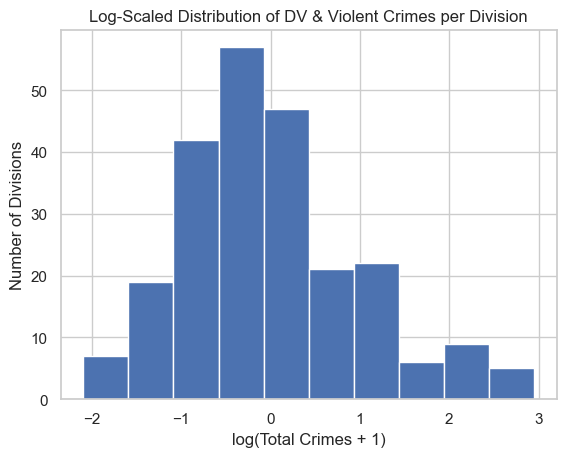

In [17]:
#set Seaborn theme for cleaner visuals
sns.set_theme(style="whitegrid")
scaler = StandardScaler()
log_dv_crime_df2 = np.log1p(filtered_merged_df["DV-Related"])

filtered_merged_df['scaled_log_vdv_violence'] = scaler.fit_transform(filtered_merged_df[['log_vdv_crime']])

# Plotting the distribution of crimes per division
# using log1p to scale the data for better visualization
plt.hist(filtered_merged_df['scaled_log_vdv_violence'])
plt.title("Log-Scaled Distribution of DV & Violent Crimes per Division")
plt.xlabel("log(Total Crimes + 1)")
plt.ylabel("Number of Divisions")
plt.savefig('../plots/total_crimes_log_scaled_distribution.png', dpi=300, bbox_inches='tight')


In [18]:
# the data looks kind of normally distributed, so we can use a normal distribution to fit the data

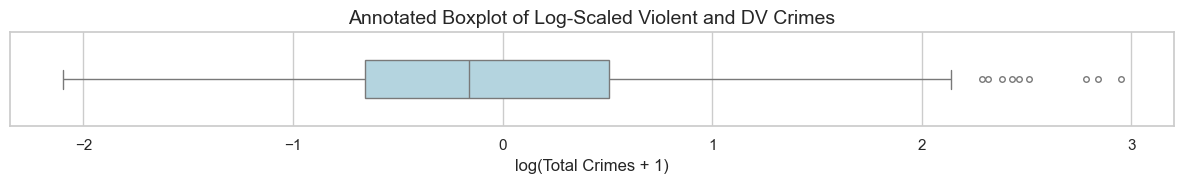

In [19]:
# Set up boxplot to visualize the distribution of log(Total Crimes + 1)
plt.figure(figsize=(12, 2))
sns.boxplot(
    x=filtered_merged_df['scaled_log_vdv_violence'], 
    color="lightblue",
    width=0.4,
    fliersize=4,
    linewidth=1
)

# Final touches
plt.title("Annotated Boxplot of Log-Scaled Violent and DV Crimes", fontsize=14)
plt.xlabel("log(Total Crimes + 1)")
plt.tight_layout()
plt.savefig('../plots/total_crimes_log_scaled_boxplot.png', dpi=300, bbox_inches='tight')

In [41]:
# there are quite a few outliers in the data, so we will remove them
# Calculate the IQR for the scaled log_vdv_violence column
Q1 = filtered_merged_df['scaled_log_vdv_violence'].quantile(0.25)
Q3 = filtered_merged_df['scaled_log_vdv_violence'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Max Value: {filtered_merged_df['scaled_log_vdv_violence'].max()}")
print(f"Values above upper bound: {filtered_merged_df[filtered_merged_df['scaled_log_vdv_violence'] > upper_bound]}")
df_clean = filtered_merged_df[filtered_merged_df['scaled_log_vdv_violence'] <= upper_bound].copy()


Lower Bound: -2.4082634891254973
Upper Bound: 2.260153800809121
Max Value: 2.9510848570064763
Values above upper bound:           Division  Violent Crime  Property Crime  Drug Offences   DV-Related  \
8          Aurukun    9122.615804     4398.728429     970.027248  1704.813806   
67       Doomadgee    4661.860130     4051.910598     408.074982  1454.938717   
109      Innisfail    5367.552704    13157.653529    4377.635197  1593.950504   
110        Ipswich    7472.042139    29853.727715    6461.912480  1844.408428   
128  Logan Central    5206.763285    22007.246377    3689.855072  1554.911433   
133         Mackay    4514.903130    20699.950323    4803.278689  1422.752111   
159  Mount Ommaney    4443.068318    18146.224531    2549.740312  2037.554934   
164   Mundingburra    5760.155815    19978.853645    4271.563717  1519.476906   
207         Stuart    7377.538071    25031.091371    5035.532995  2412.436548   

     Other Crimes  Total Crimes   IRSD Score  IRSD Decile  IRSDA Scor

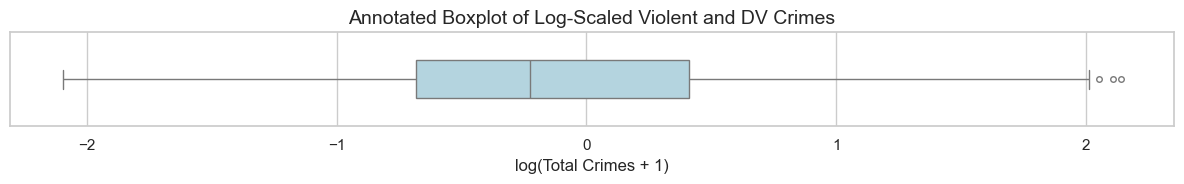

In [42]:
# Set up another boxplot to visualise the distribution of scaled log(Violent and DV Crimes)
plt.figure(figsize=(12, 2))
sns.boxplot(
    x=df_clean['scaled_log_vdv_violence'], 
    color="lightblue",
    width=0.4,
    fliersize=4,
    linewidth=1
)

# Final touches
plt.title("Annotated Boxplot of Log-Scaled Violent and DV Crimes", fontsize=14)
plt.xlabel("log(Total Crimes + 1)")
plt.tight_layout()
plt.savefig('../plots/total_crimes_log_scaled_boxplot.png', dpi=300, bbox_inches='tight')

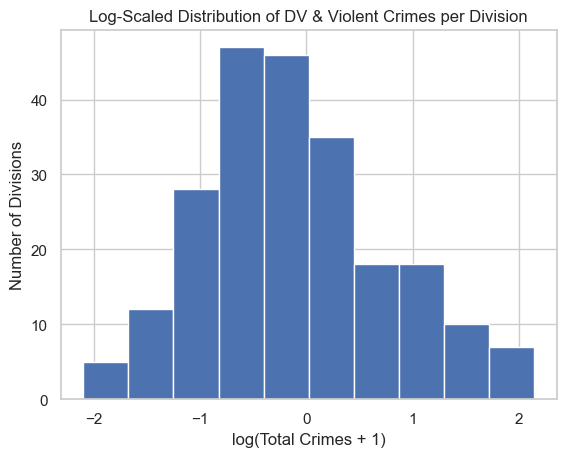

In [43]:
# histogram of the cleaned data to see the distribution of the data
df_clean = df_clean.dropna()
df_clean.describe()
plt.hist(df_clean['scaled_log_vdv_violence'])
plt.title("Log-Scaled Distribution of DV & Violent Crimes per Division")
plt.xlabel("log(Total Crimes + 1)")
plt.ylabel("Number of Divisions")
plt.savefig('../plots/total_crimes_log_scaled_distribution.png', dpi=300, bbox_inches='tight')

In [44]:
df_clean.describe()

,Violent Crime,Property Crime,Drug Offences,DV-Related,Other Crimes,Total Crimes,IRSD Score,IRSD Decile,IRSDA Score,IRSDA Decile,IER Score,IER Decile,IEO Score,IEO Decile,Usual Resident Population,Violent_DV_Crime,log_vdv_crime,scaled_log_vdv_violence
count,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000
mean,759.515031,2585.527809,586.214224,203.183071,1837.937345,5972.377480,936.728565,3.431416,924.438225,3.480088,943.061120,2.965074,920.516045,3.295133,5945.964602,962.698102,6.534636,-0.101612
std,720.359716,3182.555893,583.004907,232.079277,1557.563931,5675.094658,107.181988,2.499055,86.307256,2.787401,99.583605,2.225093,80.049524,2.848629,6552.719918,935.703319,0.792799,0.878373
min,85.700758,271.721959,25.276461,25.443511,244.535519,718.579235,492.476114,1.000000,658.673564,1.000000,509.381303,1.000000,758.922157,1.000000,487.000000,112.689394,4.733470,-2.097193
25%,318.495980,889.183882,227.044286,70.146967,896.906536,2632.546429,888.529999,1.000000,873.683447,1.000000,911.572209,1.000000,865.404639,1.000000,1188.000000,406.404866,6.009801,-0.683097
50%,500.098276,1546.928780,457.875173,130.871086,1399.872432,4065.617261,954.228299,3.000000,923.027495,2.000000,947.683514,2.000000,901.361503,2.000000,3180.000000,613.545032,6.420882,-0.227644
75%,859.570080,3273.064390,696.961115,220.898982,2184.018679,7496.468159,1008.749203,5.000000,980.442381,5.000000,1004.775029,4.000000,966.519640,5.000000,8842.750000,1091.419447,6.996147,0.409714
max,3945.641987,27694.001874,4224.929709,1437.185930,11090.909091,47652.764761,1104.983298,10.000000,1142.701375,10.000000,1109.376117,10.000000,1151.337505,10.000000,37951.000000,5214.686623,8.559426,2.141731


In [45]:
# save the cleaned DataFrame to a new CSV file
df_clean.to_csv("../data/division_offences_by_seifa_indexes.csv", index=False)
